In [1]:
import pandas as pd 
import numpy as np

#coi = pd.read_csv('coi.csv')
#locs = pd.read_csv('Daily_Census_Tract-Level_Ozone_Concentrations__2011-2014.csv')

In [2]:
coi.head()

,_id,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,...,HE_HEAT,HE_HLTHINS,SE_EMPRAT,SE_JOBPROX,SE_POVRATE,SE_PUBLIC,SE_HOME,SE_OCC,SE_MHE,SE_SINGLE
0,1,1001020100,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,424,...,105.66666,88.197968,68.187744,5.224787,9.240363,14.398734,84.335442,27.972027,60321.0,17.256638
1,2,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,...,86.00000,89.601494,82.987556,1.052632,10.677506,12.068965,75.198936,38.479000,67826.0,26.556019
2,3,1001020200,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,497,...,105.66666,82.688049,59.521217,1.727862,10.511090,13.028169,58.568073,40.000000,44039.0,48.818897
3,4,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,...,86.00000,89.871193,60.339661,0.931315,22.413794,24.137930,61.941254,30.516430,41287.0,47.470818
4,5,1001020300,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,878,...,105.66666,90.501320,82.875099,1.788376,11.823454,9.035088,76.315788,31.036932,46002.0,31.969309


In [3]:
coi[coi['countyfips'].isin([48113,48085,48121,48439])].geoid.nunique()

1172

In [4]:
locs[((locs['date'] == '01JAN2011') & (locs['statefips'] == 48))].ctfips.nunique()

1175

In [43]:
locs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965721 entries, 0 to 965720
Data columns (total 9 columns):
year          965721 non-null int64
date          965721 non-null object
statefips     965721 non-null int64
countyfips    965721 non-null int64
ctfips        965721 non-null int64
latitude      965721 non-null float64
longitude     965721 non-null float64
ds_o3_pred    965721 non-null float64
ds_o3_stdd    965721 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 66.3+ MB


In [5]:
coi_locs = pd.merge(coi,locs[((locs['date'] == '01JAN2011') & (locs['statefips'] == 48))][['ctfips','latitude','longitude']],how = 'inner',left_on = 'geoid', right_on = 'ctfips')

In [6]:
coi_locs[coi_locs['countyfips'].isin([48113,48085,48121,48439])].shape

(2344, 42)

In [7]:
coi_locs.to_csv('coi_locs.csv')

In [8]:
coi_locs.shape

(2344, 42)

In [26]:
locs[((locs['year'] == 2011) & (locs['statefips'] == 48))]

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
0,2011,01JAN2011,48,48085,48085030100,33.29592,-96.39820,33.561650,5.651388
1,2011,01JAN2011,48,48085,48085030201,33.26331,-96.53734,33.152231,5.387919
2,2011,01JAN2011,48,48085,48085030202,33.34124,-96.64279,33.424257,5.628980
3,2011,01JAN2011,48,48085,48085030203,33.34176,-96.54547,33.395477,5.459425
4,2011,01JAN2011,48,48085,48085030301,33.24016,-96.70621,33.132900,5.286403
5,2011,01JAN2011,48,48085,48085030302,33.24045,-96.75005,33.199428,5.388515
6,2011,01JAN2011,48,48085,48085030303,33.23781,-96.77913,33.096567,5.419126
7,2011,01JAN2011,48,48085,48085030304,33.24211,-96.81363,33.132576,5.188364
8,2011,01JAN2011,48,48085,48085030305,33.32224,-96.75762,33.305575,5.419888
9,2011,01JAN2011,48,48085,48085030403,33.16244,-96.81202,32.639398,5.185962


In [119]:
coi_locs.shape

(2344, 43)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

In [76]:
coi_locs = pd.read_csv('coi_locs.csv')

In [69]:
coi_locs.columns

Index(['Unnamed: 0', '_id', 'geoid', 'year', 'in100', 'msaid15', 'msaname15',
       'countyfips', 'statefips', 'stateusps', 'pop', 'ED_PRXECE',
       'ED_PRXHQECE', 'ED_ECENROL', 'ED_READING', 'ED_MATH', 'ED_HSGRAD',
       'ED_APENR', 'ED_COLLEGE', 'ED_SCHPOV', 'ED_TEACHXP', 'ED_ATTAIN',
       'HE_FOOD', 'HE_GREEN', 'HE_WALK', 'HE_VACANCY', 'HE_SUPRFND', 'HE_RSEI',
       'HE_PM25', 'HE_OZONE', 'HE_HEAT', 'HE_HLTHINS', 'SE_EMPRAT',
       'SE_JOBPROX', 'SE_POVRATE', 'SE_PUBLIC', 'SE_HOME', 'SE_OCC', 'SE_MHE',
       'SE_SINGLE', 'ctfips', 'latitude', 'longitude'],
      dtype='object')

In [81]:
pivot_df  = coi_locs[['geoid','HE_FOOD','year']].pivot(index = 'geoid',columns = 'year').reset_index()
pivot_df['perct_diff'] = pivot_df.apply(lambda row: ((row[2] - row[1])/row[1]) * 100,axis = 1)
pivot_df.columns = ['geoid', '2010', '2015', 'perct_diff']
pivot_df = pivot_df[(pivot_df['2010'] != 0) & (pivot_df['2015'] != 0)].sort_values('perct_diff', ascending = True)
pivot_df.head(100)

c:\users\kalya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\kalya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,geoid,2010,2015,perct_diff
616,48113018505,15.171074,0.013336,-99.912096
793,48121021733,10.385632,0.067041,-99.354482
268,48113007911,0.396985,0.002903,-99.268838
654,48113019204,0.559045,0.010375,-98.144216
627,48113019018,7.407057,0.139706,-98.113882
891,48439105505,1.308632,0.030585,-97.662827
661,48113019213,24.328885,0.595838,-97.550902
1113,48439113918,1.202870,0.030497,-97.464627
452,48113014308,5.533400,0.145133,-97.377146
628,48113019019,11.995319,0.449644,-96.251508


            geoid       2010      2015  perct_diff
616   48113018505  15.171074  0.013336  -99.912096
793   48121021733  10.385632  0.067041  -99.354482
268   48113007911   0.396985  0.002903  -99.268838
654   48113019204   0.559045  0.010375  -98.144216
627   48113019018   7.407057  0.139706  -98.113882
891   48439105505   1.308632  0.030585  -97.662827
661   48113019213  24.328885  0.595838  -97.550902
1113  48439113918   1.202870  0.030497  -97.464627
452   48113014308   5.533400  0.145133  -97.377146
628   48113019019  11.995319  0.449644  -96.251508


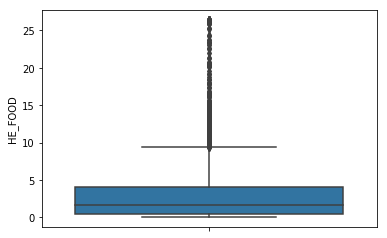

In [88]:
import warnings
warnings.filterwarnings("ignore")

def stats_percent(col,ascending,top):
    ''' specify : col_name
            : ascending order
            : count to display'''
    sb.boxplot(data = coi_locs, y = col);
    
    pivot_df  = coi_locs[['geoid',col,'year']].pivot(index = 'geoid',columns = 'year').reset_index()
    pivot_df['perct_diff'] = pivot_df.apply(lambda row: ((row[2] - row[1])/row[1]) * 100,axis = 1)
    pivot_df.columns = ['geoid', '2010', '2015', 'perct_diff']
    pivot_df = pivot_df[(pivot_df['2010'] != 0) & (pivot_df['2015'] != 0)].sort_values('perct_diff', ascending = ascending)
    print(pivot_df.head(top))
    
stats_percent('HE_FOOD',True,10)


count    2344.000000
mean      -13.565187
std         1.783235
min       -13.815511
25%       -13.815511
50%       -13.815511
75%       -13.815511
max         0.000000
Name: HE_SUPRFND, dtype: float64


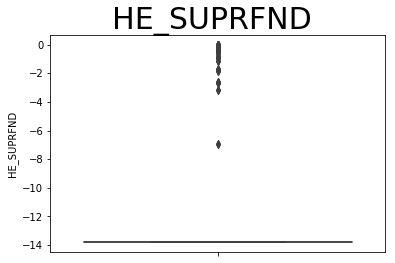

In [117]:
def box_plots(col):
    ''' specify : col_names'''

    sb.boxplot(data = coi_locs, y = col)
    plt.figtext(.5,.9,col, fontsize=30, ha='center');
    print(coi_locs[col].describe())
    
#['HE_FOOD','HE_GREEN', 'HE_WALK', 'HE_VACANCY', 'HE_SUPRFND', 'HE_RSEI',
#       'HE_PM25', 'HE_OZONE', 'HE_HEAT', 'HE_HLTHINS']:
box_plots('HE_SUPRFND')

In [89]:
pivot_df  = coi_locs[['geoid','HE_FOOD','year']].pivot(index = 'geoid',columns = 'year').reset_index()
pivot_df['perct_diff'] = pivot_df.apply(lambda row: ((row[2] - row[1])/row[1]) * 100,axis = 1)
pivot_df.columns = ['geoid', '2010', '2015', 'HE_FOOD_perct_diff']
print(pivot_df.shape)
print(pivot_df.head())

(1172, 4)
         geoid      2010      2015  HE_FOOD_perct_diff
0  48085030100  2.864479  1.665167          -41.868412
1  48085030201  0.967889  0.664946          -31.299329
2  48085030202  0.999370  1.738465           73.956165
3  48085030203  1.532795  0.453592          -70.407541
4  48085030301  4.007340  1.080588          -73.034771


In [96]:
def join_perct_diff(cols,pivot_df):
    ''' specify : col_names
                : df to join'''
    
    for col in cols:
        temp = pd.DataFrame()
        temp  = coi_locs[['geoid',col,'year']].pivot(index = 'geoid',columns = 'year').reset_index()
        temp[col + '_perct_diff'] = temp.apply(lambda row: ((row[2] - row[1])/row[1]) * 100,axis = 1)
        pivot_df = pd.concat([pivot_df,temp[col + '_perct_diff']],axis = 1)
        
    return pivot_df
    
cols = ['HE_GREEN', 'HE_WALK', 'HE_VACANCY', 'HE_SUPRFND', 'HE_RSEI',
       'HE_PM25', 'HE_OZONE', 'HE_HEAT', 'HE_HLTHINS']

pivot_df = join_perct_diff(cols,pivot_df)


In [125]:
pivot_df_c = pd.merge(coi_locs[coi_locs['year'] == 2011][['ctfips', 'latitude', 'longitude','geoid']],pivot_df,how = 'inner',on = 'geoid')
pivot_df_c.shape

(0, 16)

In [123]:
coi_locs[coi_locs['year'] == 2010][['countyfips', 'latitude', 'longitude','geoid']]

,ctfips,latitude,longitude,geoid
0,48085030100,33.29592,-96.39820,48085030100
2,48085030201,33.26331,-96.53734,48085030201
4,48085030202,33.34124,-96.64279,48085030202
6,48085030203,33.34176,-96.54547,48085030203
8,48085030301,33.24016,-96.70621,48085030301
10,48085030302,33.24045,-96.75005,48085030302
12,48085030303,33.23781,-96.77913,48085030303
14,48085030304,33.24211,-96.81363,48085030304
16,48085030305,33.32224,-96.75762,48085030305
18,48085030403,33.16244,-96.81202,48085030403


In [97]:
print(pivot_df.shape)
print(pivot_df.head())

(1172, 13)
         geoid      2010      2015  HE_FOOD_perct_diff  HE_GREEN_perct_diff  \
0  48085030100  2.864479  1.665167          -41.868412                  0.0   
1  48085030201  0.967889  0.664946          -31.299329                  0.0   
2  48085030202  0.999370  1.738465           73.956165                  0.0   
3  48085030203  1.532795  0.453592          -70.407541                  0.0   
4  48085030301  4.007340  1.080588          -73.034771                  0.0   

   HE_WALK_perct_diff  HE_VACANCY_perct_diff  HE_SUPRFND_perct_diff  \
0                 0.0             -40.696910                   -0.0   
1                 0.0             -86.842151                   -0.0   
2                 0.0             -22.529927                   -0.0   
3                 0.0             106.910550                   -0.0   
4                 0.0             -32.123186                   -0.0   

   HE_RSEI_perct_diff  HE_PM25_perct_diff  HE_OZONE_perct_diff  \
0          -17.480574

In [98]:
pivot_df.to_csv('pivot_df.csv')

In [ ]:
coi_locs